# 1. INTRODUCTION

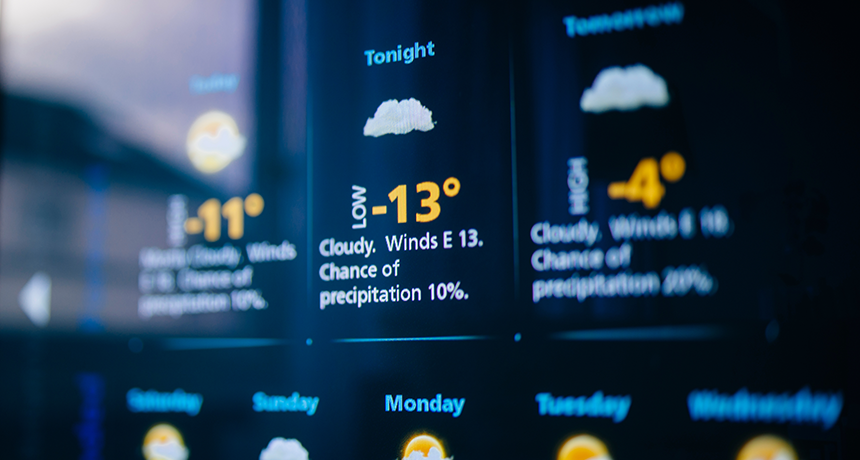

My goal here is to develop a ML model that can predict the weather of geographical areas around the world. As you know, forecasts based on temperature and precipitation are important to agriculture. Also, there are crucial for traders within commodity markets. They are used for estimating product demands and diaster management.

So, if you're optimistic about weather prediction, this is a project you should consider. 

The steps involved include : 
    
    1. import the required libraries 
    
    2. import the available data
    
    3. engage in data exploration
    
    4. do data wrangling 
    
    5. visualize your data
    
    6. Algorithm and model training
    
    7. Check for user input

# **Step 1 : Import the required Libraries**

In [5]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso

# Step 2 : Load the available Data

In [7]:
data=pd.read_csv("seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Step 3 : Data Exploration/ wrangling

In [8]:
data.isna().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [9]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

*** Another thing to do here is to look for outliers in the dataset. We can do this by using one of the following plots***

  1.Hist plot
  
  2.Box plot
 
  3.Violin plot
  
  4.Dist plot
  
  
*** For easy visualization , I prefer using the Violin Plot and Box plot***

***VIOLIN PLOT***

<AxesSubplot:xlabel='wind'>

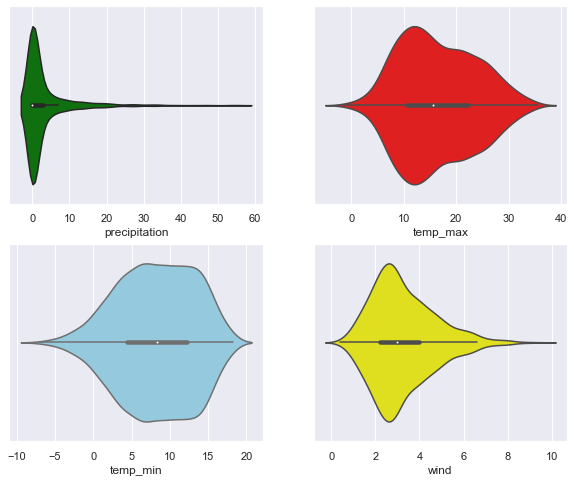

In [10]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

From the above ***Violin plot*** we can clearly understand the Skewness of the Data as the **TAIL** indicates the skewness.

***SKEWNESS USING BOXPLOT***

C:\Users\USER\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precipitation', ylabel='weather'>

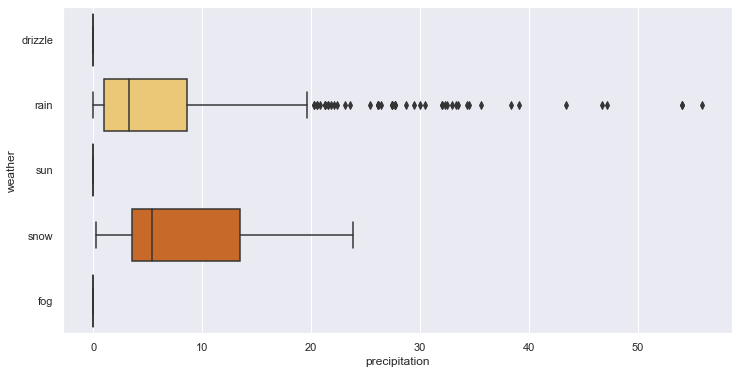

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=data,palette="YlOrBr")

From the above box plot between the ***Weather and Precipitation*** 
the value ***Rain*** has many **positive outliers** and both **Rain and Snow** were ***positively skewed/has positive skewness***.

C:\Users\USER\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp_max', ylabel='weather'>

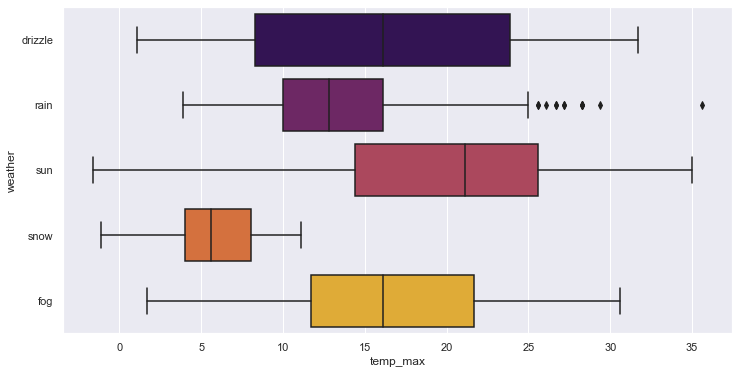

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_max","weather",data=data,palette="inferno")

C:\Users\USER\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind', ylabel='weather'>

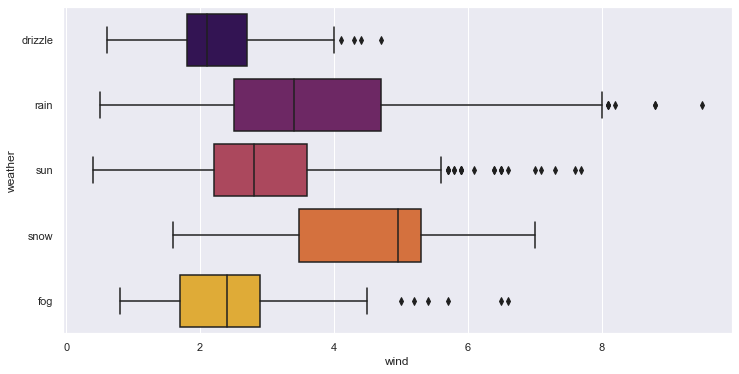

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="inferno")

From the above box plots ,we came to know that Every ***attribute of weather*** has some ***positive outliers** and it is ***both types of skewness***.

C:\Users\USER\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp_min', ylabel='weather'>

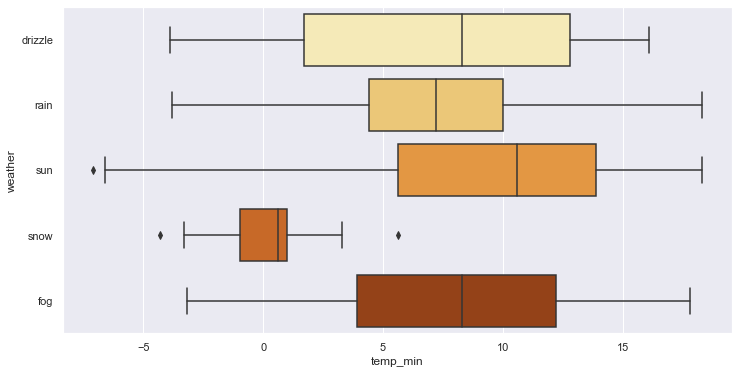

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot("temp_min","weather",data=data,palette="YlOrBr")

# Step 5 : VISUALIZATION

**HEATMAP:**

<AxesSubplot:>

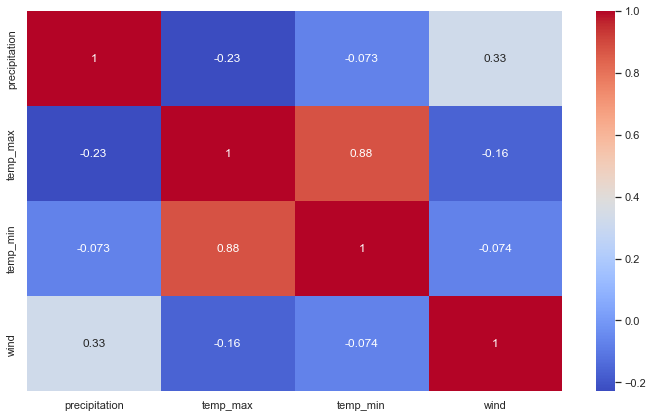

In [16]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

There is a ***positive correlation*** between ***temp_max and temp_min***.

Now, let's plot the Categorical variables 

<AxesSubplot:xlabel='weather', ylabel='count'>

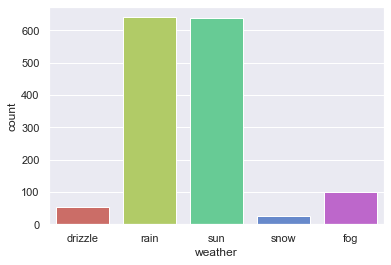

In [17]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot("weather",data=data,palette="hls")

It can be seen that ***Rain and Sun*** has the highest frequency in the plot

**Numerical - Numerical**

Pearson correlation: -0.22855481643297043
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


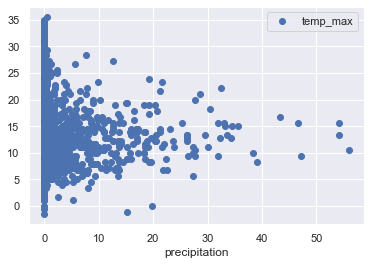

In [23]:
data.plot("precipitation","temp_max",style='o') 
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))

Pearson correlation: -0.1648566348749548
T Test and P value: Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


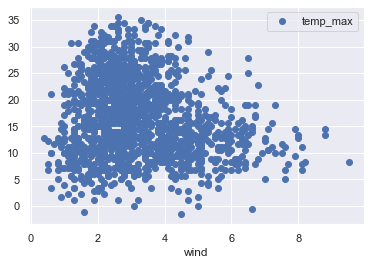

In [24]:
data.plot("wind","temp_max",style='o') 
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

<AxesSubplot:xlabel='temp_max'>

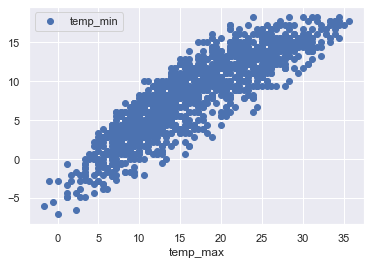

In [25]:
data.plot("temp_max","temp_min",style='o') 

As from the above result of ***T test and P value of 0*** indicates that the ***Null hypothesis*** in the corresponding columns is **rejected** and the columns are ***Statistically significant*** 

# 8.DATA PREPROCESSING:

**Drop Unnecessary Variables**

In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [19]:
df=data.drop(["date"],axis=1)

**Remove Outliers & Infinite Values**

Since this dataset contains ***Outliers ,it will be removed***,to make data set more even.

In [20]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

***Skewed Distribution Treatment***

In [21]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<AxesSubplot:xlabel='wind', ylabel='Count'>

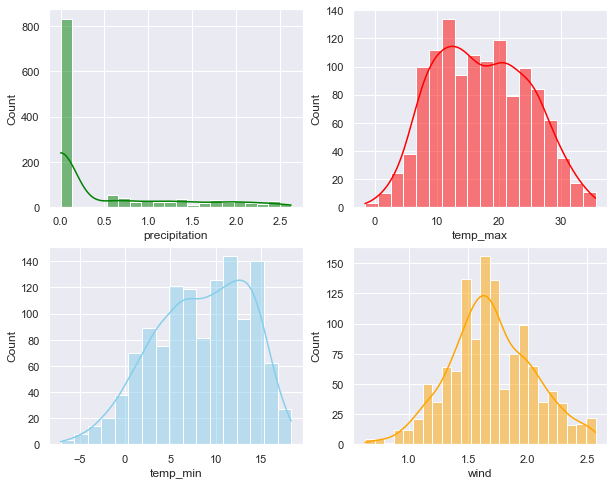

In [22]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [23]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [34]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


# ALGORITHMS AND MODEL TRAINING:

In [24]:
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

***SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES:***

In [25]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [27]:
y

array(['drizzle', 'rain', 'rain', ..., 'fog', 'sun', 'sun'], dtype=object)

In [28]:
df.loc[:,df.columns!="weather"]

,precipitation,temp_max,temp_min,wind
0,0.000000,12.8,5.0,2.167948
2,0.894427,11.7,7.2,1.516575
4,1.140175,8.9,2.8,2.469818
5,1.581139,4.4,2.2,1.483240
6,0.000000,7.2,2.8,1.516575
...,...,...,...,...
1455,0.000000,4.4,0.0,1.581139
1457,1.224745,5.0,1.7,1.140175
1458,0.000000,7.2,0.6,1.612452
1459,0.000000,5.6,-1.0,1.843909


***Scaling the weather variables using label Encoder:***

In [29]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [30]:
df["weather"].unique()

array([0, 2, 4, 3, 1])

In [47]:
y

array([0, 2, 2, ..., 1, 4, 4])

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

The ***Machine learning Models used*** are:

    1.K-Nearest Neighbour(KNN)
    
    2.Support Vector Machine(SVM)
    
    3.Gradient Boost
    
    4.Extreme Gradient Boosting(XGBC)

**K-NEAREST NEIGHBOR CLASSIFIER:**

In [32]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:78.23%


**SUPPORT VECTOR MACHINE - CLASSIFIER:**

In [33]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:77.42%


**GRADIENT BOOSTING CLASSIFIER:**

In [34]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:68.55%


**EXTREME GRADIENT BOOSTING OR XGBCLASSIFIER:**

In [35]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

[12:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy:83.06%


# 10.CHECKING FOR THE USER INPUT:

In [36]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Sun
